In [1]:
import pandas as pd

In [2]:
import seaborn  as sb

In [3]:
data = pd.read_csv("SetFiltered.csv", sep= ";") 
type(data)

pandas.core.frame.DataFrame

#Erste Erkenntnisse first look

Null gibt es sonst nicht
NAN auch nicht
-1 auch nicht 

In [4]:
data[81:82]


,MSZoning,LotArea,Neighborhood,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,TotalBsmtSF,HeatingQC,CentralAir,GrLivArea,TotRmsAbvGrd,GarageCars,YrSold,SalePrice
81,C (all),8500,IDOTRR,1Fam,4,4,1920,1950,Gambrel,649,TA,N,1317,6,1,2008,40000


In [5]:
data.describe()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,TotRmsAbvGrd,GarageCars,YrSold,SalePrice
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,10629.817778,6.014444,5.652222,1969.347778,1984.185556,1028.166667,1487.441111,6.415556,1.745556,2007.896667,176184.454444
std,9947.088936,1.336912,1.151555,29.573049,20.195265,403.019702,504.588271,1.601786,0.715887,1.306010,71412.482393
min,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,334.000000,2.000000,0.000000,2006.000000,39300.000000
25%,7432.250000,5.000000,5.000000,1953.000000,1966.000000,790.250000,1102.750000,5.000000,1.000000,2007.000000,130000.000000
50%,9475.000000,6.000000,5.000000,1971.000000,1993.000000,968.500000,1443.500000,6.000000,2.000000,2008.000000,161000.000000
75%,11700.000000,7.000000,6.000000,1998.000000,2002.000000,1249.500000,1750.500000,7.000000,2.000000,2009.000000,205000.000000
max,164660.000000,10.000000,9.000000,2009.000000,2009.000000,3206.000000,4316.000000,12.000000,4.000000,2010.000000,755000.000000


Lot Area riesiges Maximum kann riesige Auswirkungen haben. </br>
Riesiges Minimum und Maximum </br>




In [6]:
data[data["LotArea"].idxmax():data["LotArea"].idxmax()+1]

,MSZoning,LotArea,Neighborhood,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,TotalBsmtSF,HeatingQC,CentralAir,GrLivArea,TotRmsAbvGrd,GarageCars,YrSold,SalePrice
844,RL,164660,Timber,2fmCon,5,6,1965,1965,Gable,1499,Ex,Y,1786,7,2,2008,228950


In [7]:
data["MSZoning"].unique()

array(['RL', 'RM', 'FV', 'RH', 'C (all)'], dtype=object)

In [8]:
data['MSZoning'].value_counts()

RL         716
RM         145
FV          28
RH          10
C (all)      1
Name: MSZoning, dtype: int64

C (all) ist nur alleine 

In [9]:
data['Neighborhood'].value_counts()

NAmes      150
CollgCr    103
OldTown     71
Edwards     53
Sawyer      52
Gilbert     47
NWAmes      46
BrkSide     41
NridgHt     39
SawyerW     37
Crawfor     34
Somerst     34
Mitchel     33
NoRidge     26
Timber      21
IDOTRR      21
SWISU       18
ClearCr     17
StoneBr     13
MeadowV     12
Blmngtn      9
BrDale       9
Veenker      8
NPkVill      5
Blueste      1
Name: Neighborhood, dtype: int64

Blueste kommt nur einmal vor

In [10]:
data['BldgType'].value_counts()

1Fam      759
TwnhsE     68
Duplex     29
Twnhs      27
2fmCon     17
Name: BldgType, dtype: int64

Einfamiliehaushalt ist am häufigsten 

In [11]:
data['OverallQual'].value_counts()

5     248
6     244
7     193
8      92
4      78
9      23
3      13
10      6
1       2
2       1
Name: OverallQual, dtype: int64

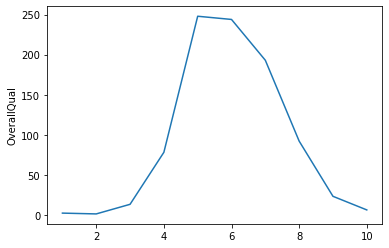

In [12]:
sb.lineplot(data['OverallQual'].value_counts().keys(), data['OverallQual'].value_counts())


schaut nach einer Gaussverteilung aus

In [13]:
data['OverallCond'].value_counts()

5    481
6    158
7    134
8     55
4     41
9     17
3     12
2      1
1      1
Name: OverallCond, dtype: int64

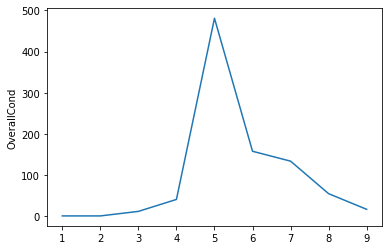

In [14]:
sb.lineplot(data['OverallCond'].value_counts().keys(), data['OverallCond'].value_counts())

In [15]:
data['RoofStyle'].value_counts()

Gable      708
Hip        171
Flat         7
Gambrel      7
Mansard      5
Shed         2
Name: RoofStyle, dtype: int64

Giebel und hip dach sind auf häufigsten 

In [16]:
data['HeatingQC'].value_counts()

Ex    448
TA    264
Gd    161
Fa     26
Po      1
Name: HeatingQC, dtype: int64

schlechte warmequaltität der Heizung ist nur 

In [17]:
data['CentralAir'].value_counts()

Y    845
N     55
Name: CentralAir, dtype: int64

Meiste haben eine Klimaanlage

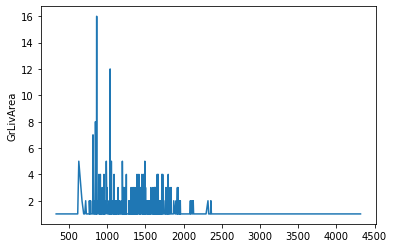

In [18]:
sb.lineplot(data['GrLivArea'].value_counts().keys(), data['GrLivArea'].value_counts())

Viele kleine und der eine ausreisser

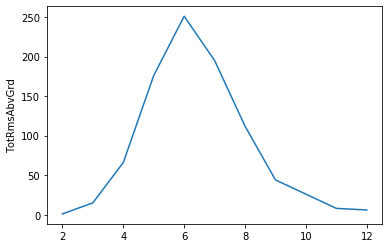

In [19]:
sb.lineplot(data['TotRmsAbvGrd'].value_counts().keys(), data['TotRmsAbvGrd'].value_counts())

Sieht gut aus

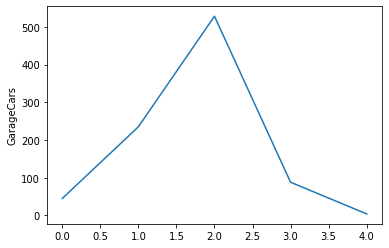

In [20]:
sb.lineplot(data['GarageCars'].value_counts().keys(), data['GarageCars'].value_counts())

geht 

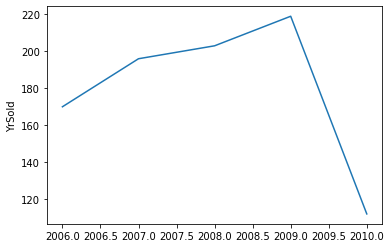

In [21]:
sb.lineplot(data['YrSold'].value_counts().keys(), data['YrSold'].value_counts())

Was war 2009.5 ?

In [22]:
data['YrSold'].value_counts()

2009    219
2008    203
2007    196
2006    170
2010    112
Name: YrSold, dtype: int64

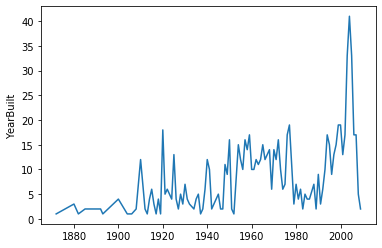

In [23]:
sb.lineplot(data['YearBuilt'].value_counts().keys(), data['YearBuilt'].value_counts())

In [24]:
YearBuilt = data['YearBuilt'].value_counts()

In [25]:
built = 0
for i in range(1940,1961):
    if i in YearBuilt.keys():
        built+=YearBuilt[i]
        print("{}: {}".format(i,YearBuilt[i]))
    else:
        print("Kien Haus im Jahr: {}".format(i))
built

1940: 12
1941: 10
1942: 2
Kien Haus im Jahr: 1943
Kien Haus im Jahr: 1944
1945: 5
1946: 2
1947: 2
1948: 11
1949: 9
1950: 16
1951: 2
1952: 1
1953: 8
1954: 15
1955: 12
1956: 10
1957: 16
1958: 14
1959: 17
1960: 10


174

In [26]:
data['YearRemodAdd'].value_counts()

1950    112
2005     53
2004     46
2006     38
2000     37
2002     36
2003     35
2007     32
1996     26
1995     25
1997     23
1998     23
1999     20
1994     16
2001     15
1976     15
2008     14
1972     14
1993     13
1970     13
1977     13
1966     12
1959     12
1990     12
1978     11
1965     11
1968     11
1967     11
1973     10
1971     10
1980      9
1964      9
1962      9
1991      9
1963      8
1975      8
1985      8
1988      8
1957      7
1960      7
1992      7
1954      7
1956      7
1987      7
1981      7
1955      7
1958      7
1969      6
1989      6
1982      6
1953      6
2009      4
1961      4
1979      4
1983      3
1984      3
1986      3
1974      2
1951      2
1952      1
Name: YearRemodAdd, dtype: int64

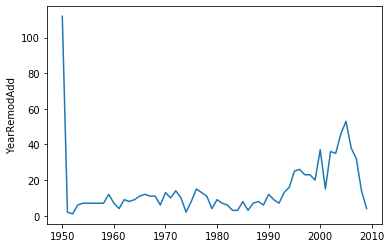

In [27]:
sb.lineplot(data['YearRemodAdd'].value_counts().keys(), data['YearRemodAdd'].value_counts())

1950 gab es eine große renoirierungswelle

In [28]:
data.corr()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,TotRmsAbvGrd,GarageCars,YrSold,SalePrice
LotArea,1.000000,0.078351,0.008624,-0.002740,0.013903,0.215555,0.242049,0.171731,0.175046,-0.029411,0.294995
OverallQual,0.078351,1.000000,-0.067541,0.506915,0.498863,0.503705,0.579224,0.420016,0.571014,0.014871,0.779105
OverallCond,0.008624,-0.067541,1.000000,-0.409406,0.108340,-0.178404,-0.064446,-0.042172,-0.173576,-0.012827,-0.045663
YearBuilt,-0.002740,0.506915,-0.409406,1.000000,0.532446,0.375331,0.150515,0.058774,0.503326,0.042634,0.473111
YearRemodAdd,0.013903,0.498863,0.108340,0.532446,1.000000,0.251307,0.234629,0.143653,0.385040,0.066435,0.465537
TotalBsmtSF,0.215555,0.503705,-0.178404,0.375331,0.251307,1.000000,0.392101,0.256067,0.408777,0.047929,0.629429
GrLivArea,0.242049,0.579224,-0.064446,0.150515,0.234629,0.392101,1.000000,0.835156,0.476391,-0.014204,0.757823
TotRmsAbvGrd,0.171731,0.420016,-0.042172,0.058774,0.143653,0.256067,0.835156,1.000000,0.357133,-0.017735,0.550198
GarageCars,0.175046,0.571014,-0.173576,0.503326,0.385040,0.408777,0.476391,0.357133,1.000000,0.009918,0.633643
YrSold,-0.029411,0.014871,-0.012827,0.042634,0.066435,0.047929,-0.014204,-0.017735,0.009918,1.000000,0.009535


Starke corr zwischen preis mit Qulität, TotalMsmtSF, LivArea, größe Garage. außerdem livArea und room above ground, Idee: eines weglassen  

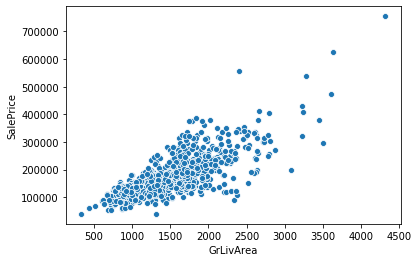

In [29]:
sb.scatterplot(data["GrLivArea"],data["SalePrice"])

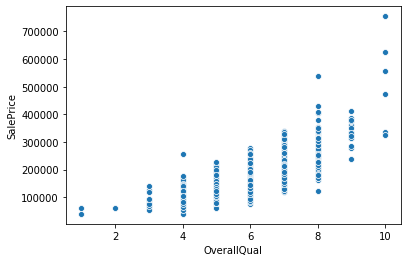

In [30]:
sb.scatterplot(data["OverallQual"],data["SalePrice"])

qualitat hat range

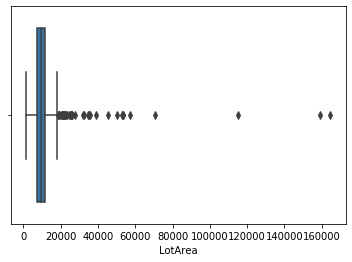

In [31]:
sb.boxplot(data["LotArea"])

aussreiser nach oben viele 

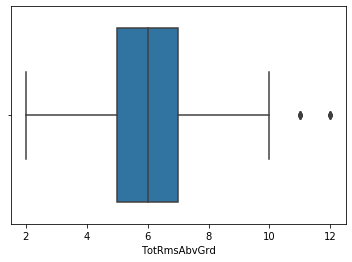

In [32]:
sb.boxplot(data["TotRmsAbvGrd"])

passt mit 2 aussreißer

In [33]:
data = data.sample(frac=1)

In [34]:
labels = data["SalePrice"]
labels

471    295493
299    132250
565    325000
555     79000
889    219500
        ...  
679    135000
606    164000
328    176000
164    190000
244    157000
Name: SalePrice, Length: 900, dtype: int64

In [35]:
lenDataSet = len(data)

In [36]:
import nltk
import numpy as np


def text_to_numbers(text, cutoff_for_rare_words = 1):
    """Function to convert text to numbers. Text must be tokenzied so that
    test is presented as a list of words. The index number for a word
    is based on its frequency (words occuring more often have a lower index).
    If a word does not occur as many times as cutoff_for_rare_words,
    then it is given a word index of zero. All rare words will be zero.
    """
    
    # Flatten list if sublists are present
    if len(text) > 1:
        flat_text = [sublist for sublist in text]
        
    else:
        flat_text = text
    
    # get word freuqncy
    fdist = nltk.FreqDist(flat_text)

    # Convert to Pandas dataframe
    df_fdist = pd.DataFrame.from_dict(fdist, orient='index')
    df_fdist.columns = ['Frequency']

    # Sort by word frequency
    df_fdist.sort_values(by=['Frequency'], ascending=False, inplace=True)

    # Add word index
    number_of_words = df_fdist.shape[0]
    df_fdist['word_index'] = list(np.arange(number_of_words)+1)

   
    
    # Convert pandas to dictionary
    word_dict = df_fdist['word_index'].to_dict()
   
    
    # Use dictionary to convert words in text to numbers
    text_numbers = []
    for string in text:
        string_numbers = word_dict[string]
        text_numbers.append(string_numbers)  
    
    return (text_numbers)

In [37]:
data.loc[:,"MSZoning"]

471    RL
299    RL
565    RL
555    RM
889    RL
       ..
679    RL
606    RL
328    FV
164    RL
244    RM
Name: MSZoning, Length: 900, dtype: object

In [38]:
stringLabels = ["MSZoning","Neighborhood","BldgType","RoofStyle","HeatingQC","CentralAir"]

In [39]:
for element in stringLabels:
    data.loc[:,element] = text_to_numbers(data.loc[:,element])
data

,MSZoning,LotArea,Neighborhood,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,TotalBsmtSF,HeatingQC,CentralAir,GrLivArea,TotRmsAbvGrd,GarageCars,YrSold,SalePrice
471,1,10226,2,1,8,5,2008,2008,1,1622,1,1,1630,8,3,2009,295493
299,1,25286,13,1,4,5,1963,1963,1,1064,3,1,1040,5,2,2007,132250
565,1,11198,19,1,9,5,2005,2007,2,1122,1,1,2504,11,3,2008,325000
555,2,5000,3,1,5,4,1900,1950,1,540,3,2,1440,6,1,2006,79000
889,1,9375,2,1,7,5,1997,1998,1,1057,1,1,2034,8,2,2009,219500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,1,21286,5,1,5,5,1948,1950,1,720,2,1,1271,7,1,2008,135000
606,1,7128,12,1,7,5,1941,1950,1,918,3,1,1646,7,1,2007,164000
328,3,3230,11,2,6,5,1999,1999,1,729,3,1,1458,5,2,2007,176000
164,1,9313,2,1,7,5,2004,2004,1,864,1,1,1728,7,2,2009,190000


In [40]:
rawdata = data.loc[:,"MSZoning":"YrSold"]
rawdata

,MSZoning,LotArea,Neighborhood,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,TotalBsmtSF,HeatingQC,CentralAir,GrLivArea,TotRmsAbvGrd,GarageCars,YrSold
471,1,10226,2,1,8,5,2008,2008,1,1622,1,1,1630,8,3,2009
299,1,25286,13,1,4,5,1963,1963,1,1064,3,1,1040,5,2,2007
565,1,11198,19,1,9,5,2005,2007,2,1122,1,1,2504,11,3,2008
555,2,5000,3,1,5,4,1900,1950,1,540,3,2,1440,6,1,2006
889,1,9375,2,1,7,5,1997,1998,1,1057,1,1,2034,8,2,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,1,21286,5,1,5,5,1948,1950,1,720,2,1,1271,7,1,2008
606,1,7128,12,1,7,5,1941,1950,1,918,3,1,1646,7,1,2007
328,3,3230,11,2,6,5,1999,1999,1,729,3,1,1458,5,2,2007
164,1,9313,2,1,7,5,2004,2004,1,864,1,1,1728,7,2,2009


In [41]:
import math

In [42]:
trainData = rawdata[0:math.floor(lenDataSet*0.8)]

In [43]:
validateData = rawdata[math.ceil(lenDataSet*0.8):math.floor(lenDataSet*0.95)] 

In [44]:
testData = rawdata[math.ceil(lenDataSet*0.95):]

In [45]:
trainLabels = labels[0:math.floor(lenDataSet*0.8)] 

In [46]:
validateLabels = labels[math.ceil(lenDataSet*0.8):math.floor(lenDataSet*0.95)]

In [47]:
testLabels = labels[math.ceil(lenDataSet*0.95):]

In [48]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 1000, random_state = 42, max_features = 3)
rf.fit(trainData, trainLabels)
#n_estimators = Anzahl an trees 
#random_state = 
# max_featurs = anzahl der feautres maximal 


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=3, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [49]:
rf.score(validateData, validateLabels)


0.8806120829485032

In [60]:
import sklearn
#import sklearn.cross_validation

In [59]:
 from sklearn.model_selection import cross_val_score

In [62]:
rfK = RandomForestRegressor(n_estimators = 1000, random_state = 42, max_features = 3)
scores = cross_val_score(rfK, trainData, trainLabels, cv=5)
scores

array([0.8863775 , 0.88947932, 0.88605216, 0.76800928, 0.87499224])

In [64]:
rfK = RandomForestRegressor(n_estimators = 1000, random_state = 42, max_features = "sqrt")
scores = cross_val_score(rfK, trainData, trainLabels, cv=5)
scores

array([0.88864743, 0.88917413, 0.89479597, 0.77896035, 0.87552725])

In [70]:
sqrtFeatures = 4
rfK = RandomForestRegressor(n_estimators = 1000, random_state = 42, max_features = sqrtFeatures)
scores = cross_val_score(rfK, trainData, trainLabels, cv=10)
sum(scores)/len(scores)


array([0.88864743, 0.88917413, 0.89479597, 0.77896035, 0.87552725])

In [71]:
sqrtFeatures = 4
rfK = RandomForestRegressor(n_estimators = 1000, random_state = 42, max_features = sqrtFeatures + 1)
scores = cross_val_score(rfK, trainData, trainLabels, cv=10)
sum(scores)/len(scores)

array([0.88792826, 0.88967285, 0.89353329, 0.78112674, 0.87719156])

In [72]:
sqrtFeatures = 4
rfK = RandomForestRegressor(n_estimators = 1000, random_state = 42, max_features = sqrtFeatures - 1)
scores = cross_val_score(rfK, trainData, trainLabels, cv=5)
sum(scores)/len(scores)

array([0.8863775 , 0.88947932, 0.88605216, 0.76800928, 0.87499224])

In [91]:
sqrtFeatures = 4
rfK = RandomForestRegressor(n_estimators = 1000, random_state = 42, max_features = sqrtFeatures - 2)
scores = cross_val_score(rfK, trainData, trainLabels, cv=10)
sum(scores)/len(scores)

0.8591020666725061

In [92]:
sqrtFeatures = 4
rfK = RandomForestRegressor(n_estimators = 1000, random_state = 42, max_features = sqrtFeatures + 2)
scores = cross_val_score(rfK, trainData, trainLabels, cv=10)
sum(scores)/len(scores)

0.8722180018071203

In [93]:
from sklearn.ensemble import GradientBoostingRegressor

In [94]:
gbr = GradientBoostingRegressor(
    max_depth=1,
    learning_rate=1.0
)
gbr.fit(trainData, trainLabels)
gbr.score(validateData, validateLabels)
#gbr.predict(rawdata[1:2])


0.8978186901115396

In [95]:
labels[1:2]

299    132250
Name: SalePrice, dtype: int64